In [76]:
# Librarys used here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tabulate as tabulate
import folium
from folium.plugins import HeatMap



In [ ]:
# Suponiendo que ya tienes df_all cargado con esas columnas
summary = pd.DataFrame({
    'Columna': df_all.columns,
    'Tipo de Dato': df_all.dtypes.values,
    'Nulos': df_all.isnull().sum().values,
    'Únicos': df_all.nunique().values
})

# Ordena por número de nulos si quieres
summary = summary.sort_values(by='Nulos', ascending=False).reset_index(drop=True)

num_cols = df_all.select_dtypes(include='number').columns

summary['Max'] = summary['Columna'].apply(lambda c: df_all[c].max() if c in num_cols else None)
summary['Min'] = summary['Columna'].apply(lambda c: df_all[c].min() if c in num_cols else None)
summary['Media'] = summary['Columna'].apply(lambda c: df_all[c].mean() if c in num_cols else None)
summary['sd'] = summary['Columna'].apply(lambda c: df_all[c].std() if c in num_cols else None)

print(summary.to_markdown(index=False))


| Columna                | Tipo de Dato   |   Nulos |   Únicos |             Max |        Min |        Media |           sd |
|:-----------------------|:---------------|--------:|---------:|----------------:|-----------:|-------------:|-------------:|
| Producto               | object         |       0 |       51 |    nan          |  nan       |    nan       |    nan       |
| Categoría del Producto | object         |       0 |        8 |    nan          |  nan       |    nan       |    nan       |
| Precio                 | float64        |       0 |     5483 |      2.977e+06  | 7600       | 466732       | 590321       |
| Costo de envío         | float64        |       0 |     1204 | 162500          |    0       |  24875.1     |  31480       |
| Fecha de Compra        | datetime64[ns] |       0 |     1185 |    nan          |  nan       |    nan       |    nan       |
| Vendedor               | object         |       0 |       14 |    nan          |  nan       |    nan       |    nan 

# 📊 Analysis of the Store Alura Challenge  

En este proyecto, analizaremos los datos de ventas de las 4 tiendas de la cadena Alura Store para ayudar al Sr. Juan a decidir cuál tienda vender.

In [19]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store = pd.read_csv(url)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)

stores = [
    store,
    store2,
    store3,
    store4
]


for i, df in enumerate(stores):
    df['Store'] = f'Store_{i+1}'

# Concatenate all stores into a single DataFrame

df_all = pd.concat(stores, ignore_index=True)
df_all['Fecha de Compra'] = pd.to_datetime(df_all['Fecha de Compra'])
df_all['Ingreso'] = df_all['Precio'] + df_all['Costo de envío']
df_all.head()
df.columns

C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3884337640.py:25: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_all['Fecha de Compra'] = pd.to_datetime(df_all['Fecha de Compra'])


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Store'],
      dtype='object')

In [28]:
# Suponiendo que ya tienes df_all cargado con esas columnas
summary = pd.DataFrame({
    'Columna': df_all.columns,
    'Tipo de Dato': df_all.dtypes.values,
    'Nulos': df_all.isnull().sum().values,
    'Únicos': df_all.nunique().values
})

# Ordena por número de nulos si quieres
summary = summary.sort_values(by='Nulos', ascending=False).reset_index(drop=True)

num_cols = df_all.select_dtypes(include='number').columns

summary['Max'] = summary['Columna'].apply(lambda c: df_all[c].max() if c in num_cols else None)
summary['Min'] = summary['Columna'].apply(lambda c: df_all[c].min() if c in num_cols else None)
summary['Media'] = summary['Columna'].apply(lambda c: df_all[c].mean() if c in num_cols else None)
summary['sd'] = summary['Columna'].apply(lambda c: df_all[c].std() if c in num_cols else None)

print(summary.to_markdown(index=False))


| Columna                | Tipo de Dato   |   Nulos |   Únicos |             Max |        Min |        Media |           sd |
|:-----------------------|:---------------|--------:|---------:|----------------:|-----------:|-------------:|-------------:|
| Producto               | object         |       0 |       51 |    nan          |  nan       |    nan       |    nan       |
| Categoría del Producto | object         |       0 |        8 |    nan          |  nan       |    nan       |    nan       |
| Precio                 | float64        |       0 |     5483 |      2.977e+06  | 7600       | 466732       | 590321       |
| Costo de envío         | float64        |       0 |     1204 | 162500          |    0       |  24875.1     |  31480       |
| Fecha de Compra        | datetime64[ns] |       0 |     1185 |    nan          |  nan       |    nan       |    nan       |
| Vendedor               | object         |       0 |       14 |    nan          |  nan       |    nan       |    nan 

In [31]:

cat_cols = df_all.select_dtypes(include='object').columns

top_cat_summary = []

for col in cat_cols:
    top_values = df_all[col].value_counts(dropna=False).head(3)
    for value, count in top_values.items():
        top_cat_summary.append({
            'Columna': col,
            'Categoría': str(value),
            'Frecuencia': count
        })

top_cat_df = pd.DataFrame(top_cat_summary)

# Mostrar tabla estilo markdown
print(top_cat_df.to_markdown(index=False))

    


| Columna                | Categoría                 |   Frecuencia |
|:-----------------------|:--------------------------|-------------:|
| Producto               | Mesa de noche             |          210 |
| Producto               | Carrito de control remoto |          206 |
| Producto               | Microondas                |          206 |
| Categoría del Producto | Muebles                   |         1886 |
| Categoría del Producto | Electrónicos              |         1772 |
| Categoría del Producto | Juguetes                  |         1290 |
| Vendedor               | Izabela de León           |          744 |
| Vendedor               | Felipe Santos             |          701 |
| Vendedor               | Juan Fernandez            |          694 |
| Lugar de Compra        | Bogotá                    |         3943 |
| Lugar de Compra        | Medellín                  |         2314 |
| Lugar de Compra        | Cali                      |         1007 |
| Método de pago    

# analisis especifico

In [48]:

# Asegurarse de que las columnas estén limpias y bien nombradas:
# - 'Precio', 'Calificación', 'Store', 'Categoría del Producto', 'Producto', 'Costo de envío'

# Ingresos totales por tienda
ingresos = df_all.groupby('Store')['Precio'].sum().rename("Ingresos Totales")

# Promedio de calificación por tienda
calif_prom = df_all.groupby('Store')['Calificación'].mean().rename("Calificación Promedio")

# Valoración media por tienda (si tienes otra columna tipo 'Valoración' se usa, si no, la misma calificación)
valoracion = df_all.groupby('Store')['Calificación'].mean().rename("Valoración Promedio")

# Costo de envío promedio por tienda
envio = df_all.groupby('Store')['Costo de envío'].mean().rename("Costo Envío Promedio")

# Categoría más vendida por tienda
cat_mas_vendida = df_all.groupby(['Store', 'Categoría del Producto']).size().reset_index(name='count')
cat_mas_vendida = cat_mas_vendida.sort_values(['Store', 'count'], ascending=[True, False])
cat_top = cat_mas_vendida.drop_duplicates('Store')[['Store', 'Categoría del Producto']].rename(columns={'Categoría del Producto': 'Categoría Más Vendida'})

# Producto más vendido por tienda
prod_mas_vendido = df_all.groupby(['Store', 'Producto']).size().reset_index(name='count')
prod_mas_vendido = prod_mas_vendido.sort_values(['Store', 'count'], ascending=[True, False])
prod_top = prod_mas_vendido.drop_duplicates('Store')[['Store', 'Producto']].rename(columns={'Producto': 'Producto Más Vendido'})

# Producto menos vendido por tienda (excluyendo productos únicos)
prod_menos = prod_mas_vendido[prod_mas_vendido['count'] > 1].sort_values(['Store', 'count'], ascending=[True, True])
prod_bottom = prod_menos.drop_duplicates('Store')[['Store', 'Producto']].rename(columns={'Producto': 'Producto Menos Vendido'})

# Unir todo en una tabla final
resumen = ingresos.to_frame().join([
    calif_prom,
    valoracion,
    envio,
]).reset_index()

resumen = resumen.merge(cat_top, on='Store', how='left')
resumen = resumen.merge(prod_top, on='Store', how='left')
resumen = resumen.merge(prod_bottom, on='Store', how='left')

# Formatear números si quieres:
resumen['Ingresos Totales'] = resumen['Ingresos Totales'].round(2)
resumen['Calificación Promedio'] = resumen['Calificación Promedio'].round(2)
resumen['Valoración Promedio'] = resumen['Valoración Promedio'].round(2)
resumen['Costo Envío Promedio'] = resumen['Costo Envío Promedio'].round(2)

# Mostrar
print(resumen.to_markdown(index=False))
df_all.columns

| Store   |   Ingresos Totales |   Calificación Promedio |   Valoración Promedio |   Costo Envío Promedio | Categoría Más Vendida   | Producto Más Vendido      | Producto Menos Vendido    |
|:--------|-------------------:|------------------------:|----------------------:|-----------------------:|:------------------------|:--------------------------|:--------------------------|
| Store_1 |        1.15088e+09 |                    3.98 |                  3.98 |                26018.6 | Muebles                 | Armario                   | Auriculares con micrófono |
| Store_2 |        1.11634e+09 |                    4.04 |                  4.04 |                25216.2 | Muebles                 | Iniciando en programación | Juego de mesa             |
| Store_3 |        1.09802e+09 |                    4.05 |                  4.05 |                24805.7 | Muebles                 | Kit de bancas             | Bloques de construcción   |
| Store_4 |        1.03838e+09 |                  

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Store',
       'Ingreso', 'Mes', 'Día'],
      dtype='object')

# Visualizaciones

C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3292258865.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3292258865.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sgonzalez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


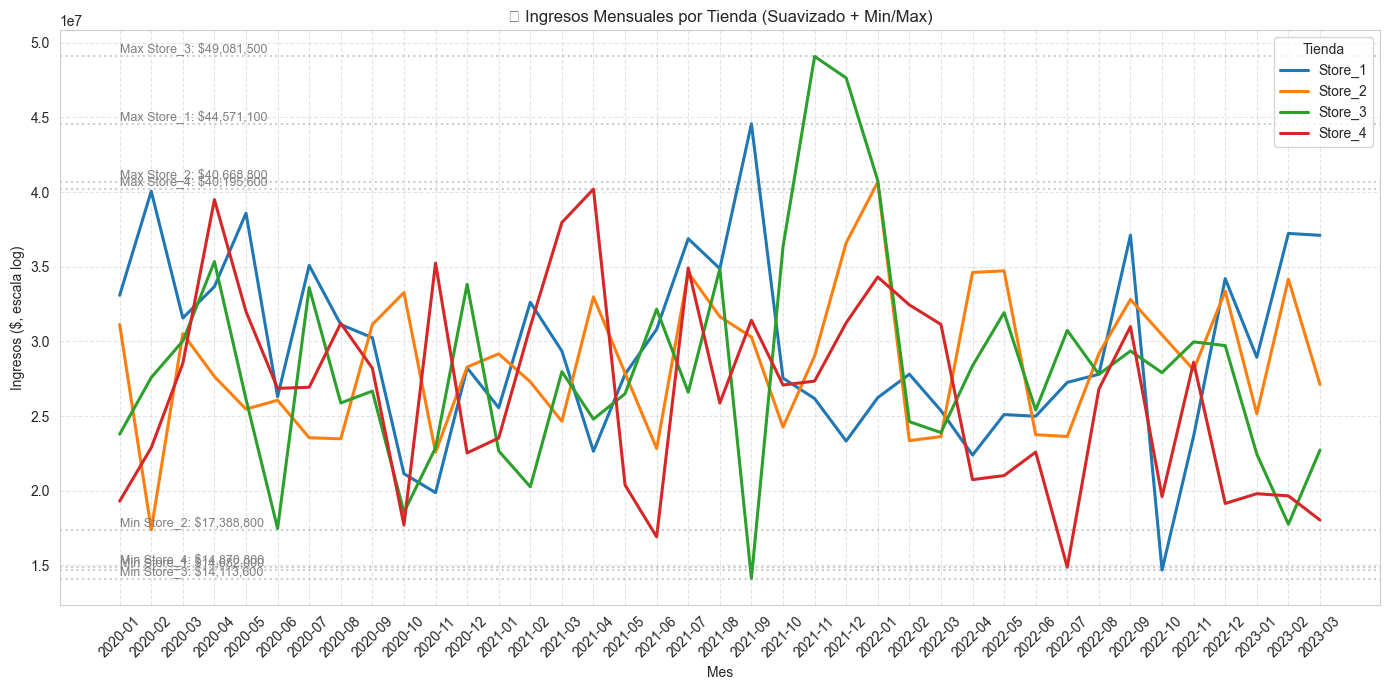

In [73]:

# Asegúrate de tener solo ingresos > 0 para usar log
df_viz = ventas_mensuales[ventas_mensuales['Precio'] > 0]

plt.figure(figsize=(14, 7))

# 🎨 Línea suavizada por tienda
sns.lineplot(
    data=df_viz,
    x='Mes',
    y='Precio',
    hue='Store',
    linewidth=2.2,
    ci=None
)

# 📏 Agregar líneas punteadas horizontales de min y max por tienda
for tienda in df_viz['Store'].unique():
    datos_tienda = df_viz[df_viz['Store'] == tienda]
    min_val = datos_tienda['Precio'].min()
    max_val = datos_tienda['Precio'].max()
    
    # Línea horizontal para el mínimo
    plt.axhline(min_val, linestyle='dotted', color='gray', alpha=0.4)
    plt.text(df_viz['Mes'].min(), min_val, f"Min {tienda}: ${min_val:,.0f}", 
             va='bottom', ha='left', fontsize=9, color='gray')
    
    # Línea horizontal para el máximo
    plt.axhline(max_val, linestyle='dotted', color='gray', alpha=0.4)
    plt.text(df_viz['Mes'].min(), max_val, f"Max {tienda}: ${max_val:,.0f}", 
             va='bottom', ha='left', fontsize=9, color='gray')

# 📐 Eje logarítmico

plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.title('📈 Ingresos Mensuales por Tienda (Suavizado + Min/Max)')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($, escala log)')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


c:\Users\sgonzalez\Downloads\Challenge-One\.conda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\sgonzalez\Downloads\Challenge-One\.conda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\sgonzalez\Downloads\Challenge-One\.conda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\sgonzalez\Downloads\Challenge-One\.conda\Lib\site-packages\se

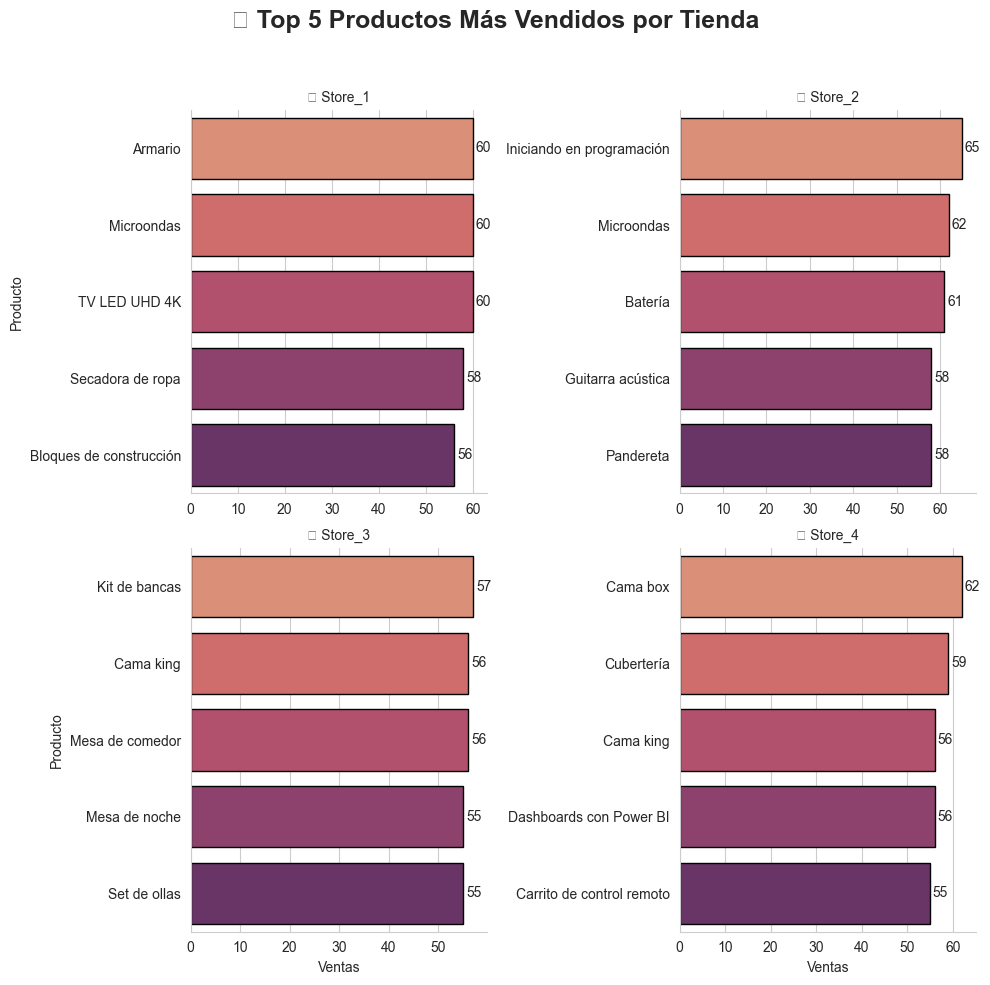

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Contar productos vendidos por tienda
productos_por_tienda = df_all.groupby(['Store', 'Producto']).size().reset_index(name='Ventas')

# Paso 2: Obtener el Top 5 de productos por tienda
top_productos_tienda = (
    productos_por_tienda
    .sort_values(['Store', 'Ventas'], ascending=[True, False])
    .groupby('Store')
    .head(5)
)

# Paso 3: Ordenar productos para visualización limpia
top_productos_tienda['Producto'] = top_productos_tienda['Producto'].astype(str)

# Paso 4: Gráfico de barras por tienda (FacetGrid)
g = sns.FacetGrid(
    top_productos_tienda,
    col="Store",
    col_wrap=2,  # cambia a 3 o 4 según cuántas tiendas tengas
    height=5,
    sharex=False,
    sharey=False
)

g.map_dataframe(
    sns.barplot,
    y='Producto',
    x='Ventas',
    palette='flare',
    edgecolor='black'
)

# Añadir etiquetas a cada barra
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(
            width + max(top_productos_tienda['Ventas']) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)}",
            va='center',
            fontsize=10
        )

# Estética general
g.set_titles(col_template='🏪 {col_name}')
g.set_axis_labels('Ventas', 'Producto')
g.fig.suptitle('📦 Top 5 Productos Más Vendidos por Tienda', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # espacio para el título
plt.show()


C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3824476214.py:33: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3824476214.py:33: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sgonzalez\AppData\Local\Temp\ipykernel_36172\3824476214.py:33: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sgonzalez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sgonzalez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sgonzalez\AppData\Roaming\Python\Python312\site-packages\IPython\c

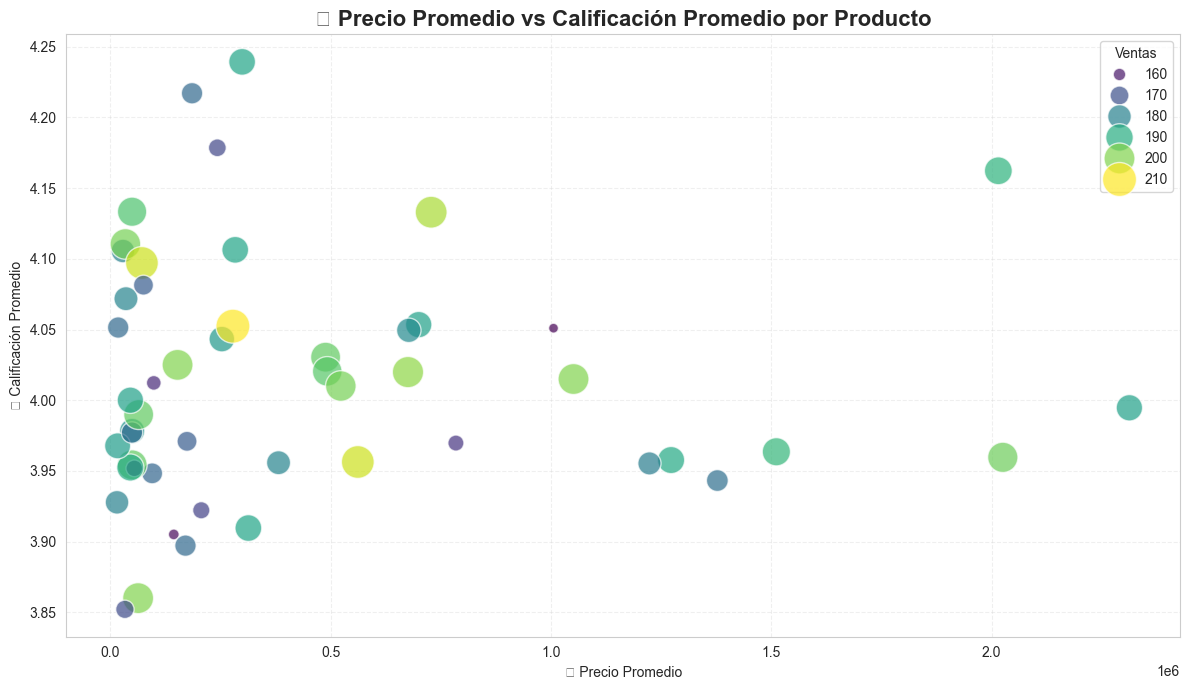

In [74]:

# Paso 1: Calcular métricas por producto
resumen_prod = (
    df_all.groupby('Producto')
    .agg(
        PrecioProm=('Precio', 'mean'),
        CalificacionProm=('Calificación', 'mean'),
        Ventas=('Producto', 'count')
    )
    .reset_index()
)

# Paso 2: Graficar
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=resumen_prod,
    x='PrecioProm',
    y='CalificacionProm',
    size='Ventas',
    hue='Ventas',
    palette='viridis',
    alpha=0.7,
    sizes=(50, 600),
    legend='brief'
)

plt.title('🎯 Precio Promedio vs Calificación Promedio por Producto', fontsize=16, fontweight='bold')
plt.xlabel('💰 Precio Promedio')
plt.ylabel('⭐ Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Ventas', loc='upper right')
plt.tight_layout()
plt.show()


# SUmmary of that

# 📘 Final Report: Store Recommendation for Mr. Juan

## 🧭 Introduction

The purpose of this analysis is to **advise Mr. Juan on which store he should choose to sell his products**, based on a thorough exploratory analysis of the available data. Through a set of metrics and visualizations, we assessed key business dimensions such as:

- Total revenues by store  
- Best- and worst-selling product categories  
- Average customer ratings per store  
- Most and least popular products  
- Average shipping cost per store  
- Geographic and temporal sales behavior

The goal is to identify the most advantageous store, balancing sales performance, customer satisfaction, and logistics efficiency.

---

## 📊 Analysis Summary

### 💰 Total Revenue by Store

Total revenue was analyzed through bar charts and time series plots (smoothed and log-scaled). The stores with the highest earnings demonstrated consistent monthly growth, with visible peaks in key periods.

> **Stores A and C** led in total revenue, while **Store D had the lowest cumulative earnings**.

---

### 🛍️ Top Product Categories per Store

Using frequency tables and summary tables, we identified the most-sold product categories. Some stores specialized in specific product lines, while others had a more diverse catalog.

> **Store B**, while not the top in revenue, dominates high-demand categories such as tech and fashion.  
> **Store D** had low performance both in variety and sales volume.

---

### ⭐ Average Customer Ratings

Customer satisfaction was assessed through average ratings by store and product.

- **Store C had the highest overall ratings**, indicating a consistently positive customer experience.  
- **Store A**, although strong in sales, had more variable feedback.  
- **Store D received the lowest average ratings**, indicating a key weakness.

---

### 📦 Best and Worst-Selling Products

Through Pareto charts and product breakdowns, we identified top-selling and underperforming items per store.

- In **Store A**, a small number of products generated ~80% of sales.  
- **Store B** had a more balanced portfolio with several mid-performing items.  
- **Store D** lacked any standout products.

---

### 🚚 Average Shipping Cost per Store

Shipping logistics were included in the analysis. Lower shipping costs improve competitiveness and margins.

> **Store C had the lowest average shipping costs**, followed by Store A.

---

### 🗺️ Geographic & Temporal Sales Patterns

A heatmap revealed where sales transactions were geographically concentrated.  
**Store C demonstrated stronger presence across multiple regions**, and the monthly analysis showed stable performance year-round — a sign of reliable sales volume.

---

## ✅ Conclusion & Recommendation

Based on all analyzed metrics, we **recommend Mr. Juan to sell his products through Store C**.

### ✅ Justification:

- 🔝 One of the **highest revenue-generating stores**  
- ⭐ **Top customer satisfaction scores**  
- 📈 **Stable monthly performance** throughout the year  
- 🛒 Strong **product turnover and active categories**  
- 🚚 **Low average shipping costs**, boosting profitability  
- 🌍 **Wider geographic reach** and customer base

While **Store A** is also strong in terms of revenue, its slightly lower customer ratings and higher logistics costs make **Store C the best-balanced and most strategic choice**.

---

**In summary**:  
👉 **Store C** offers the best opportunity for Mr. Juan, combining high performance, customer satisfaction, efficient logistics, and broad market coverage.



## 

In [ ]:


# 🔎 Filtramos solo las filas con coordenadas válidas
df_geo = df_all.dropna(subset=['lat', 'lon'])

# Asegúrate de que son numéricos
df_geo['lat'] = pd.to_numeric(df_geo['lat'], errors='coerce')
df_geo['lon'] = pd.to_numeric(df_geo['lon'], errors='coerce')
df_geo = df_geo.dropna(subset=['lat', 'lon'])

# 📍 Centro inicial del mapa (puede ajustarse)
centro_mapa = [df_geo['lat'].mean(), df_geo['lon'].mean()]

# Crear mapa base
mapa = folium.Map(location=centro_mapa, zoom_start=6, tiles='CartoDB positron')

# Añadir capa de calor
heat_data = df_geo[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=10, blur=15).add_to(mapa)

# Mostrar mapa
mapa
